# Introduction to Data Visualization with Matplotlib

### Index
- Introduction to matplotlib
- Plotting time-series
- Quantitative comparisons and statistical visualizations
- Sharing visualizations with others

## Matplotlib

![matplotlib_figure](./matplotlib_figure.Png)

### Image source: Source:
- https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

- 파이썬 오픈소스 라이브러리 중에 가장 널리 사용되는 시각화 라이브러리입니다.


- 2002년부터 만들어졌으며, MATLAB의 기능들을 파이썬으로 가져오는 컨셉으로 시작되었습니다.


- 각종 논문에서 figure를 그릴 때, 사용될 만큼 깔끔하게 그래프를 그려주는 것으로 유명합니다.


- **`Figure`** 라는 도화지에 여러가지 **`component`** 를 얹어서 그래프를 완성하는 컨셉으로 구현됩니다.


- 크게 **`pyplot`** 을 이용하여 구현하는 방법과 **`OOP-style`** 을 이용하여 구현하는 두 가지 방법이 있습니다.


- 빠르게 적당한 퀄리티의 그래프를 그린다면 pyplot을, 디테일하게 이것저것 표현을 한다면 OOP-style로 구현하는 것을 추천합니다.

## Matplotlib: Visualization with python

![matplotlib_figure_2](./matplotlib_figure_2.png)

- matplotlib은 파이썬에 다양한 그래프 작성방법을 제공합니다.


- seaborn, folium 같은 다른 다양한 시각화 라이브러리들은 matplotlib을 dependency로 가지고 있거나, 영향을 많이 받았습니다.


- matplotlib은 figure()를 기본적으로 그래프 그리는 객체로 사용하고, plot(), scatter() 함수를 이용하여 원하는 그래프를 그립니다.

## Index
1. bar
2. pie
3. scatter
4. heatmap
5. histogram
6. timeseries
7. catogram

In [87]:
# import module
from datetime import datetime
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## 1. bar

In [8]:
# file import
df = pd.read_excel('./data.xlsx')
df.head(5)

,product_id,product_type,product_name,size,colour,price,prd_quantity,description,sales_id,order_id,...,order_date,delivery_date,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",22,5,...,2021-3-23,2021-03-24,Artemas Vasilischev,Bigender,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1121,231,...,2021-3-20,2021-04-09,Olimpia Tankus,Genderfluid,39,6434 Callum RoadApt. 396,3505,North Jessica,Western Australia,Australia
2,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1741,353,...,2021-3-30,2021-04-05,Ellynn Korba,Genderqueer,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia
3,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",3201,644,...,2021-3-13,2021-03-22,Brade Caught,Genderqueer,56,38 Baumbach Estate DrApt. 545,7847,Elijahburgh,Queensland,Australia
4,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",4962,992,...,2021-7-23,2021-08-14,Thorsten Sowrey,Polygender,50,7024 Sauer DriveSuite 553,4196,Port Isabelle,South Australia,Australia


In [10]:
datetime.strptime(df['order_date'][0],'%Y-%m-%d').strftime('%Y-%m-%d') # p는 parse, strptime을 통해, 데이터를 datetype으로 읽고 싶다, 파싱하고 싶다! # 파싱한 것을 strftime으로 str 타입 포맷팅

'2021-03-23'

In [11]:
df['order_date'].map( lambda x : datetime.strptime(x,'%Y-%m-%d').strftime('%Y-%m-%d') ) # 한꺼번에 해주기! 람다 & 맵, x가 중요!, x가 계속해서 바뀜, x는 인덱스별 오더데이터로 이해!

0       2021-03-23
1       2021-03-20
2       2021-03-30
3       2021-03-13
4       2021-07-23
           ...    
4995    2021-02-18
4996    2021-08-19
4997    2021-10-22
4998    2021-08-31
4999    2021-05-21
Name: order_date, Length: 5000, dtype: object

In [12]:
df['order_date'].map(lambda x : datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m-%d'))

0       2021-03-23
1       2021-03-20
2       2021-03-30
3       2021-03-13
4       2021-07-23
           ...    
4995    2021-02-18
4996    2021-08-19
4997    2021-10-22
4998    2021-08-31
4999    2021-05-21
Name: order_date, Length: 5000, dtype: object

In [13]:
df['order_date'] = df['order_date'].map(lambda x : datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m-%d'))
df.head(3)

,product_id,product_type,product_name,size,colour,price,prd_quantity,description,sales_id,order_id,...,order_date,delivery_date,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",22,5,...,2021-03-23,2021-03-24,Artemas Vasilischev,Bigender,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1121,231,...,2021-03-20,2021-04-09,Olimpia Tankus,Genderfluid,39,6434 Callum RoadApt. 396,3505,North Jessica,Western Australia,Australia
2,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1741,353,...,2021-03-30,2021-04-05,Ellynn Korba,Genderqueer,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia


In [14]:
sales_df = df.groupby('order_date').sales_quantity.sum().reset_index()
sales_df

,order_date,sales_quantity
0,2021-01-01,31
1,2021-01-02,52
2,2021-01-03,25
3,2021-01-04,41
4,2021-01-05,56
...,...,...
286,2021-10-20,25
287,2021-10-21,61
288,2021-10-22,45
289,2021-10-23,20


In [15]:
sales_df.loc[(sales_df['order_date'] >= '2021-01-01') & (sales_df['order_date'] < '2021-02-01')]

,order_date,sales_quantity
0,2021-01-01,31
1,2021-01-02,52
2,2021-01-03,25
3,2021-01-04,41
4,2021-01-05,56
5,2021-01-06,17
6,2021-01-07,42
7,2021-01-08,13
8,2021-01-09,45
9,2021-01-10,65


In [16]:
sales_jan_df = sales_df[(sales_df['order_date'] >= '2021-01-01') & (sales_df['order_date'] < '2021-02-01')]
sales_jan_df

,order_date,sales_quantity
0,2021-01-01,31
1,2021-01-02,52
2,2021-01-03,25
3,2021-01-04,41
4,2021-01-05,56
5,2021-01-06,17
6,2021-01-07,42
7,2021-01-08,13
8,2021-01-09,45
9,2021-01-10,65


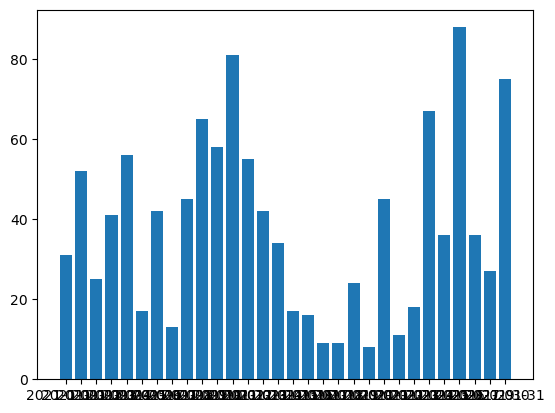

In [17]:
import matplotlib.pyplot as plt

plt.bar(sales_jan_df['order_date'], sales_jan_df['sales_quantity']) # x 축, y 축
plt.show() # 나온 그래프가 이쁘지가 않다..

Text(0, 0.5, 'sales quantity')

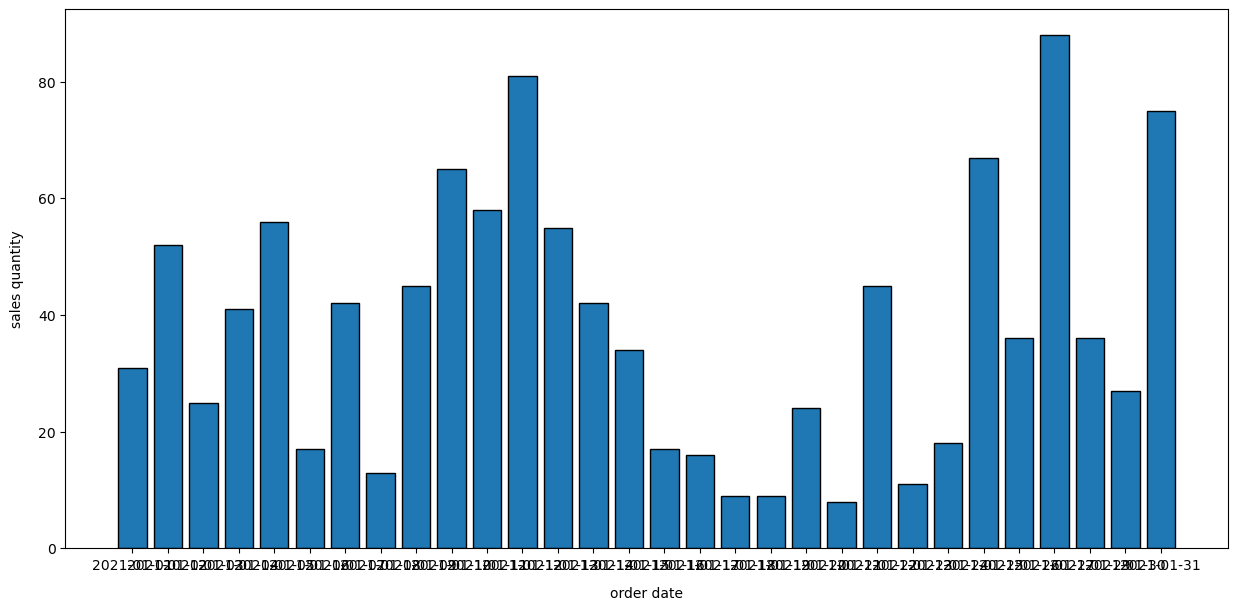

In [18]:
plt.figure(figsize=(15,7)) # 바꿔보면서 감을 찾아보자! 
plt.bar(sales_jan_df['order_date'], sales_jan_df['sales_quantity'], width=0.8, edgecolor='black') # 이것도 확 이쁘지는 않음..

plt.xlabel('order date', labelpad=10)
plt.ylabel('sales quantity', labelpad=10)

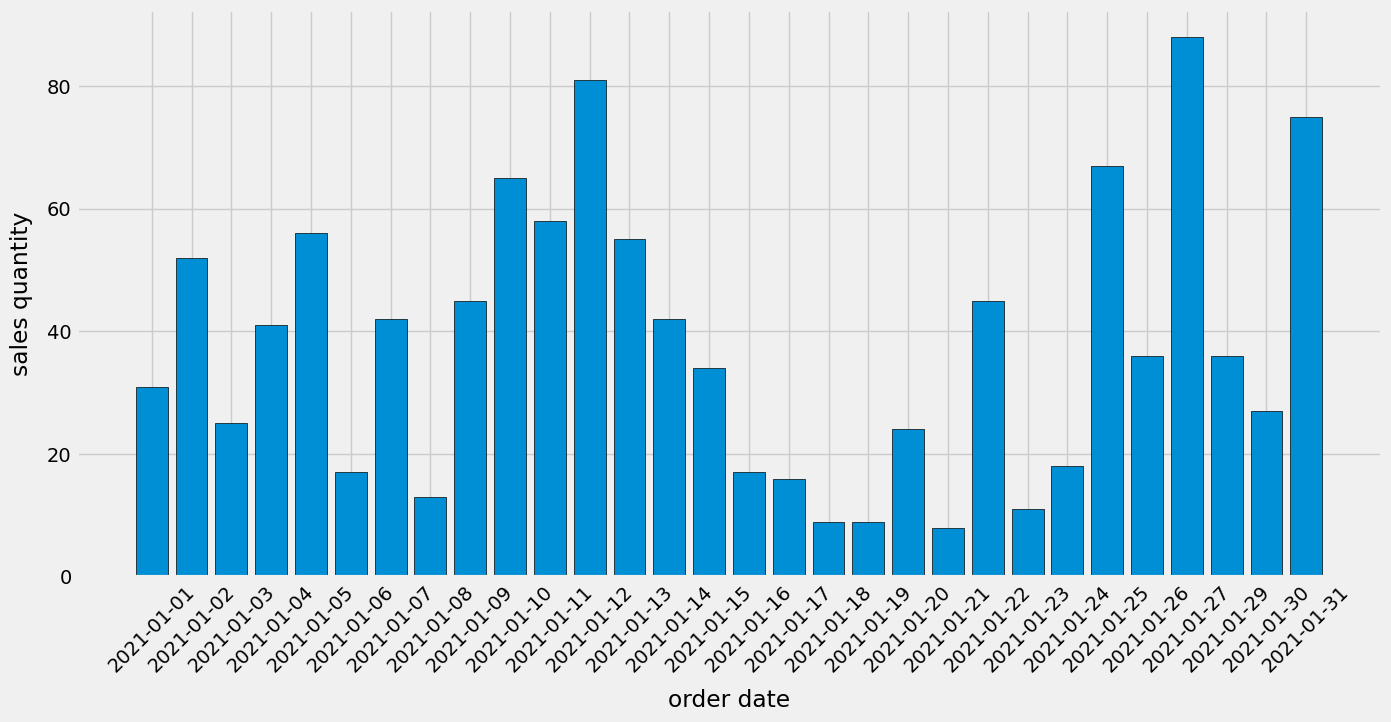

In [19]:
# https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,7))
plt.bar(sales_jan_df['order_date'], sales_jan_df['sales_quantity'], width=0.8, edgecolor='black')

plt.xlabel('order date', labelpad=10)
plt.ylabel('sales quantity', labelpad=10)

plt.xticks(rotation=45) # x축, 날짜에 대한 기울기 옵션 추가

plt.show()

In [20]:
df.head(3)

,product_id,product_type,product_name,size,colour,price,prd_quantity,description,sales_id,order_id,...,order_date,delivery_date,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",22,5,...,2021-03-23,2021-03-24,Artemas Vasilischev,Bigender,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1121,231,...,2021-03-20,2021-04-09,Olimpia Tankus,Genderfluid,39,6434 Callum RoadApt. 396,3505,North Jessica,Western Australia,Australia
2,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1741,353,...,2021-03-30,2021-04-05,Ellynn Korba,Genderqueer,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia


In [22]:
prd_size_cnt = df.pivot_table(index='product_type', columns='size', values='sales_quantity', aggfunc='sum')
prd_size_cnt

size,L,M,S,XL,XS
product_type,,,,,
Jacket,676,683,672,618,694
Shirt,634,662,689,629,645
Trousers,688,691,631,699,651


Text(0, 0.5, 'sales_quantity')

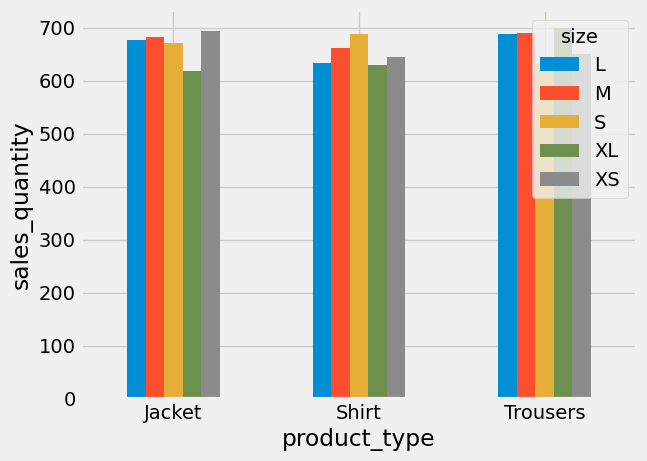

In [23]:
# https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html

plt.style.use('fivethirtyeight')

ax = prd_size_cnt.plot(kind='bar', rot=0)
ax.set_ylabel('sales_quantity')

Text(0, 0.5, 'sales_quantity')

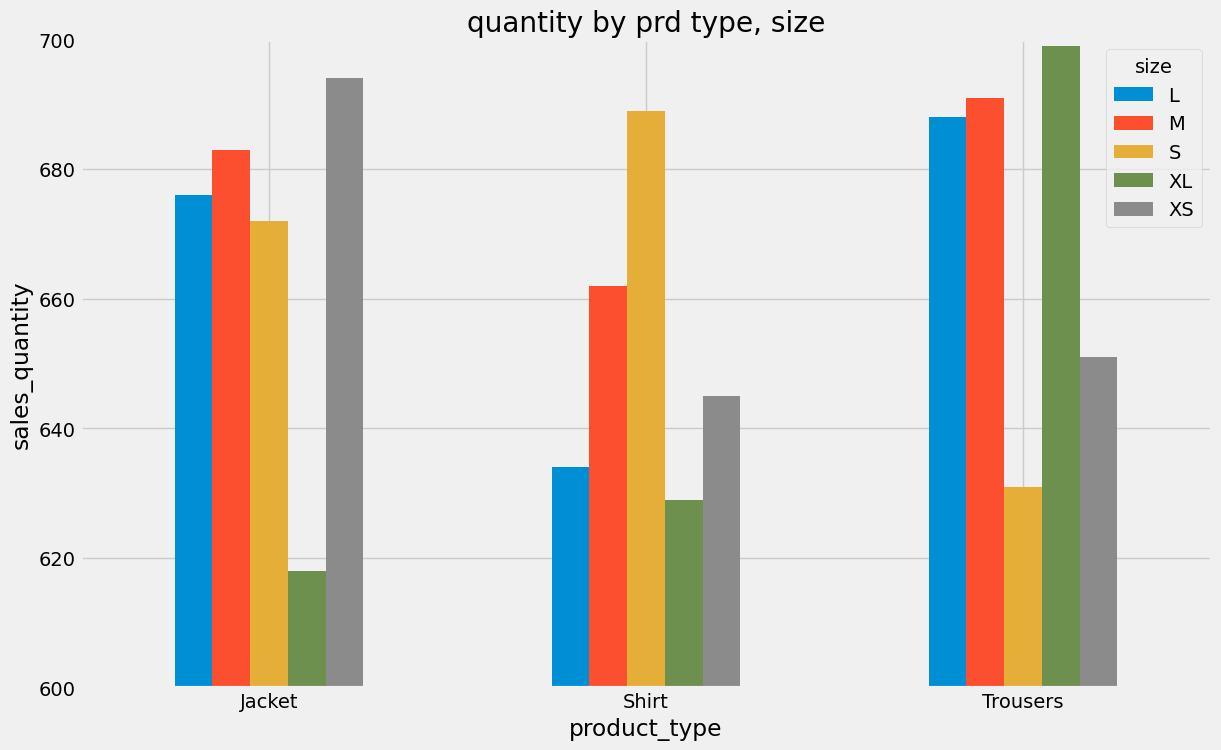

In [24]:
plt.style.use('fivethirtyeight')
ax = prd_size_cnt.plot(kind='bar', rot=0, figsize=(13,8), ylim=[600, 700], title='quantity by prd type, size') # ylim을 통해 y 축 범위 설정! # 먼저 전체 데이터를 보여주고 그 다음 확대한 내용에 대해 보여주자!
ax.set_ylabel('sales_quantity')

Text(0, 0.5, 'sales_quantity')

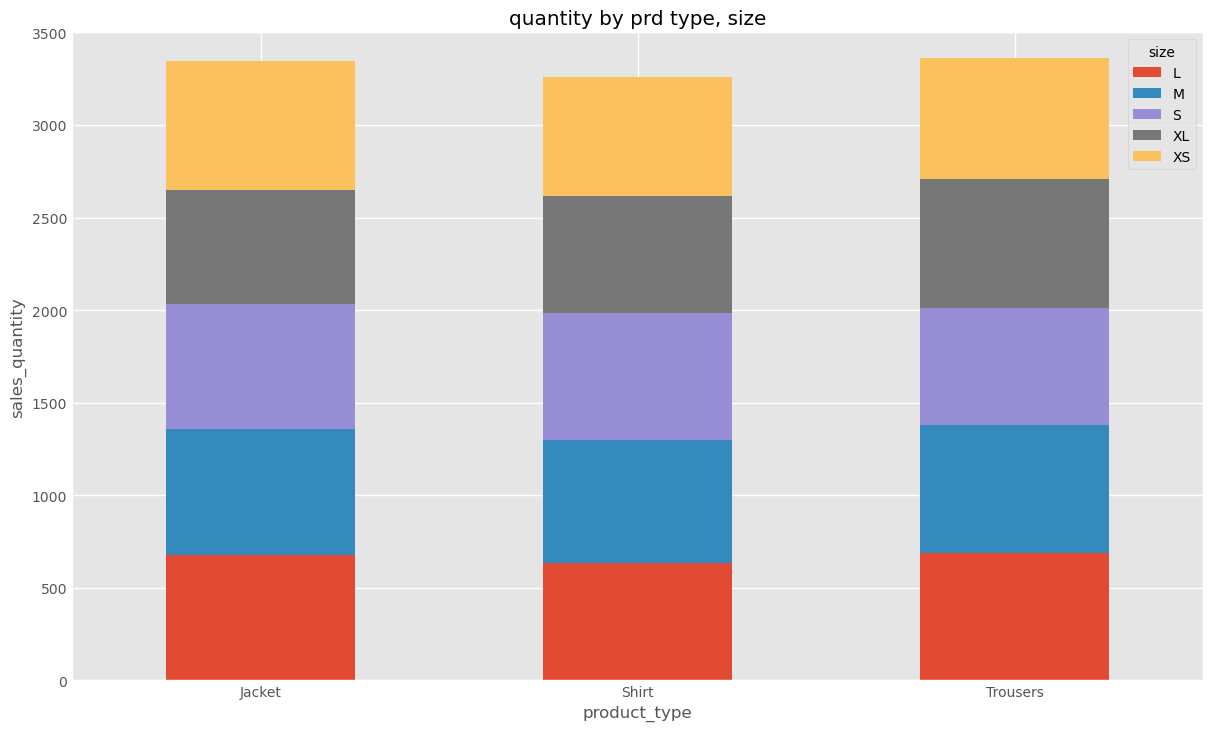

In [25]:
plt.style.use('ggplot') # 누적 막대 그래프
ax = prd_size_cnt.plot(kind='bar', rot=0, figsize=(13,8), ylim=[0, 3500]
                       , title='quantity by prd type, size', stacked=True) # 이쁘지만 아쉽다.. 격차가 크거나 차지하는 비율이 달라야 의미있는 데이터..
ax.set_ylabel('sales_quantity')

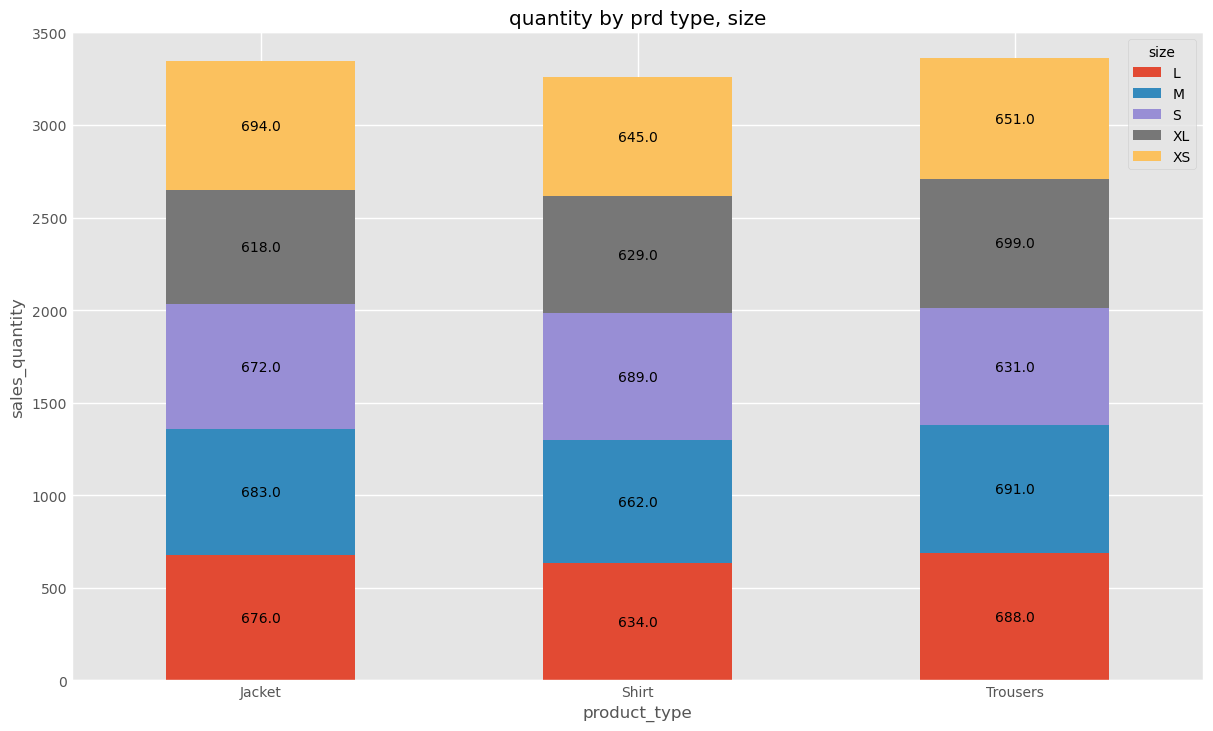

In [26]:
plt.style.use('ggplot')
ax = prd_size_cnt.plot(kind='bar', rot=0, figsize=(13,8), ylim=[0, 3500]
                       , title='quantity by prd type, size', stacked=True)
ax.set_ylabel('sales_quantity')

for c in ax.containers:
  labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
  ax.bar_label(c, labels=labels, label_type='center')

## 2. pie

In [27]:
df.groupby('product_type').total_price.sum()

product_type
Jacket      357026
Shirt       333600
Trousers    341174
Name: total_price, dtype: int64

In [28]:
pie_df = df.groupby('product_type').total_price.sum().reset_index()
pie_df

,product_type,total_price
0,Jacket,357026
1,Shirt,333600
2,Trousers,341174


([<matplotlib.patches.Wedge at 0x124140cd0>,
 [Text(0.5115973946901688, 0.9737905861869027, 'Jacket'),
  Text(-1.0987189800358388, -0.05307167708869121, 'Shirt'),
  Text(0.5579840611137209, -0.9479735162666938, 'Trousers')])

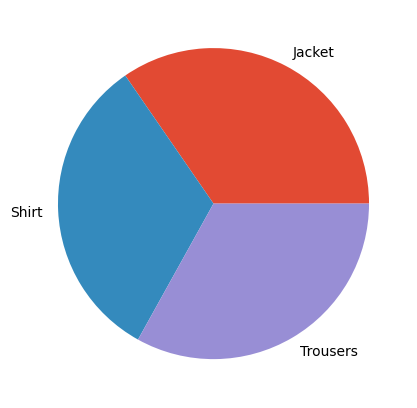

In [30]:
plt.style.use('ggplot')

plt.pie(pie_df['total_price'], labels=pie_df['product_type'])

Text(0.5, 1.0, 'GMV by product type')

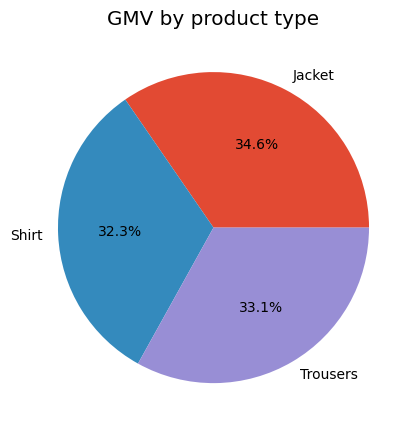

In [31]:
plt.style.use('ggplot')
plt.pie(pie_df['total_price'], labels=pie_df['product_type'], autopct='%1.1f%%')
plt.title('GMV by product type')

Text(0.5, 1.0, 'GMV by product type')

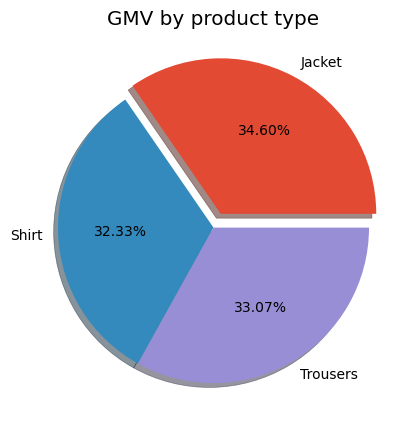

In [32]:
plt.style.use('ggplot')
plt.pie(pie_df['total_price'], labels=pie_df['product_type'], autopct='%1.2f%%'
      , shadow = True, explode=[0.1, 0, 0]) # 그림자, 간격
plt.title('GMV by product type')

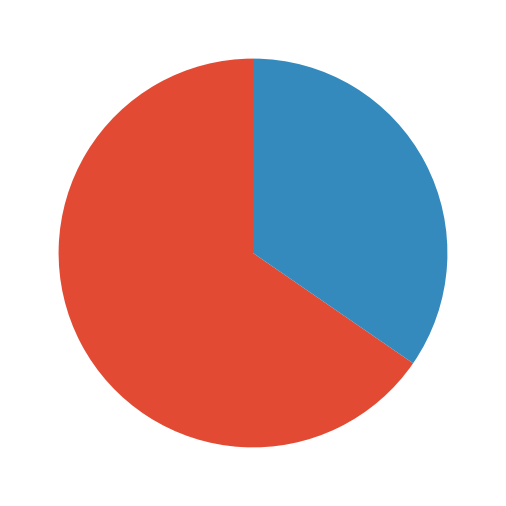

In [33]:
fig, ax = plt.subplots(figsize=(6, 6))
 
ax.pie([65.4, 34.6], startangle=90)
plt.show()

Text(0.5, 1.0, 'Jacket GMV')

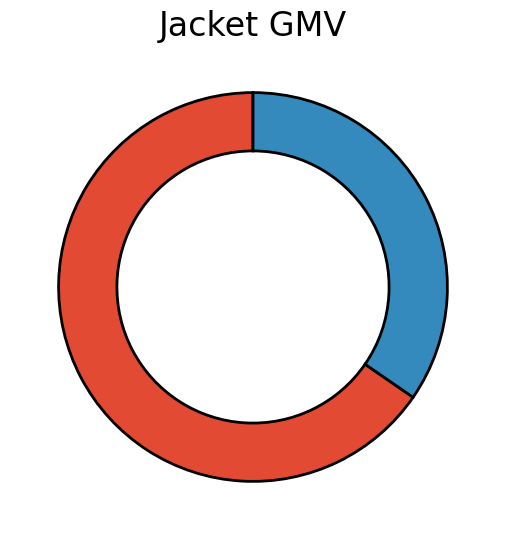

In [34]:
fig, ax = plt.subplots(figsize=(6, 6))

wedgeprops = {'width':0.3, 'linewidth':2, 'edgecolor':'black'}

ax.pie([65.4, 34.6], wedgeprops=wedgeprops, startangle=90)
plt.title('Jacket GMV', fontsize=24, loc='center')

Text(0, 0, '34.6%')

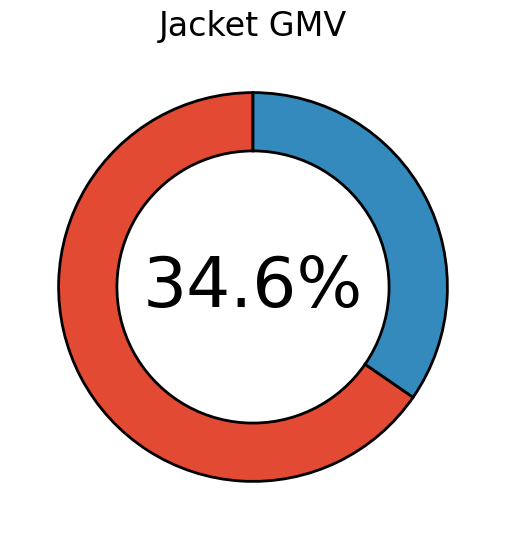

In [35]:
fig, ax = plt.subplots(figsize=(6, 6))

wedgeprops = {'width':0.3, 'linewidth':2, 'edgecolor':'black'}

ax.pie([65.4, 34.6], wedgeprops=wedgeprops, startangle=90)
plt.title('Jacket GMV', fontsize=24, loc='center')

plt.text(0, 0, "34.6%", ha='center', va='center', fontsize=50)

Text(0, 0, '34.6%')

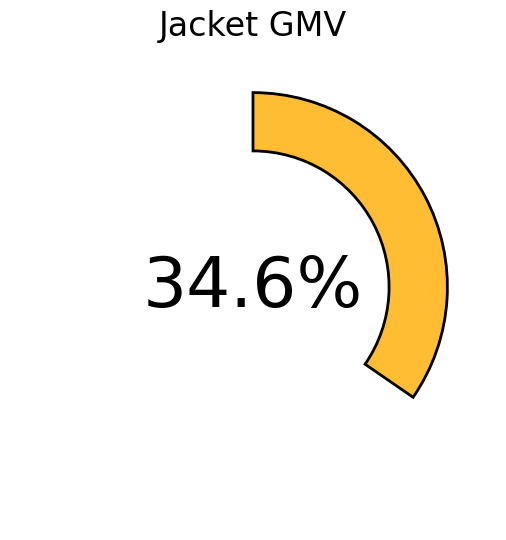

In [36]:
fig, ax = plt.subplots(figsize=(6, 6))

wedgeprops = {'width':0.3, 'linewidth':2, 'edgecolor':'black'}

div, _ = ax.pie([65.4, 34.6], wedgeprops=wedgeprops, startangle=90, colors=['white', '#FFBD33'])
plt.title('Jacket GMV', fontsize=24, loc='center')

div[0].set_edgecolor('white')

plt.text(0, 0, "34.6%", ha='center', va='center', fontsize=50)

Text(0, 0, '65.4%')

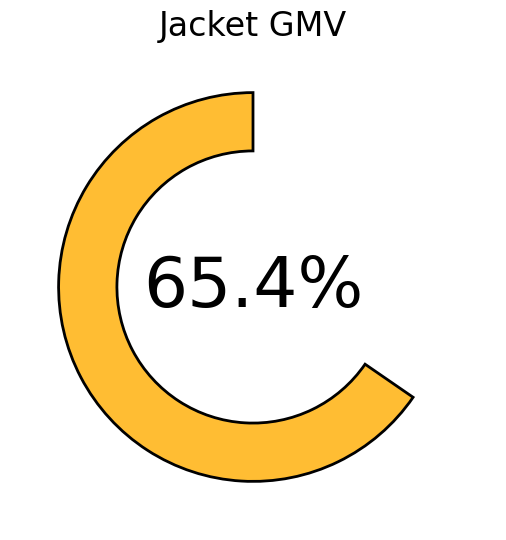

In [37]:
fig, ax = plt.subplots(figsize=(6, 6))

wedgeprops = {'width':0.3, 'linewidth':2, 'edgecolor':'black'}

div, _ = ax.pie([65.4, 34.6], wedgeprops=wedgeprops, startangle=90, colors=['#FFBD33', 'white'])
plt.title('Jacket GMV', fontsize=24, loc='center')

div[1].set_zorder(0)
div[1].set_edgecolor('white')

plt.text(0, 0, "65.4%", ha='center', va='center', fontsize=50)

## 3. scatter

In [40]:
iris = load_iris()
iris  # 딕셔너리 타입, 꽃잎과 꽃받침 데이터

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [41]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [42]:
target_df = pd.DataFrame(data=iris.target, columns=['target'])
target_df.head(3)

,target
0,0
1,0
2,0


In [43]:
target_df.loc[target_df['target'] == 0, 'target'] = 'setosa'
target_df.loc[target_df['target'] == 1, 'target'] = 'versicolor'
target_df.loc[target_df['target'] == 2, 'target'] = 'virginica'
target_df.head(3)

,target
0,setosa
1,setosa
2,setosa


In [44]:
df = pd.concat([iris_df, target_df], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

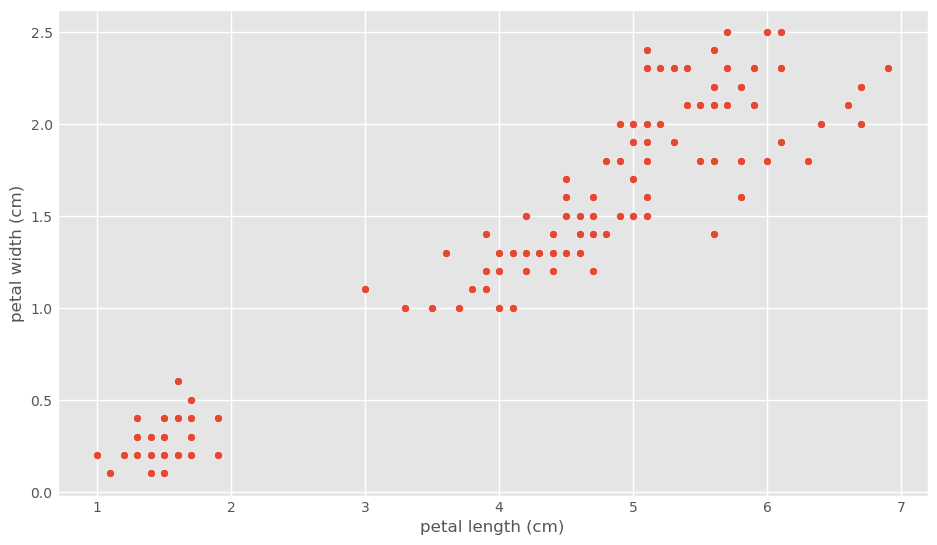

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)') # 양의 상관 관계를 갖지 않을까? 추측 가능

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

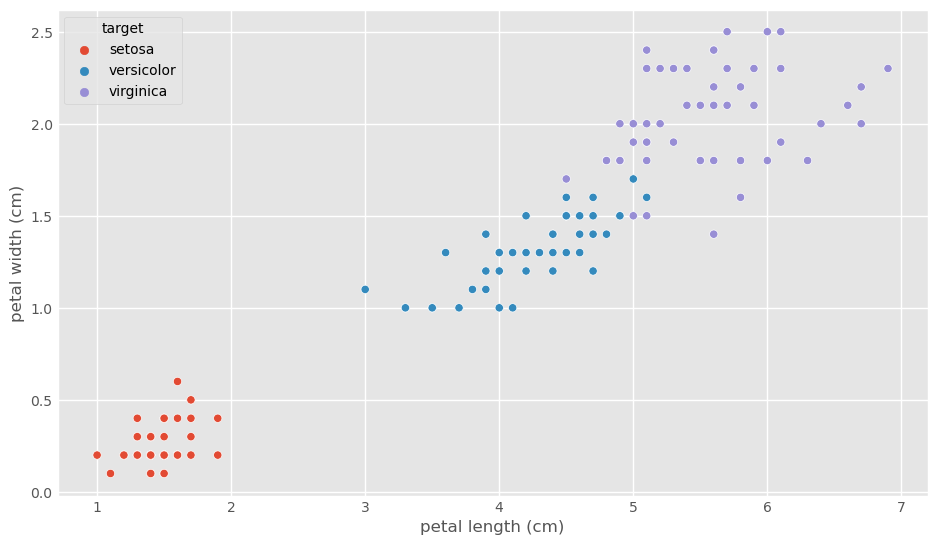

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='target') # hue, 타겟 별로 색상 변경

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

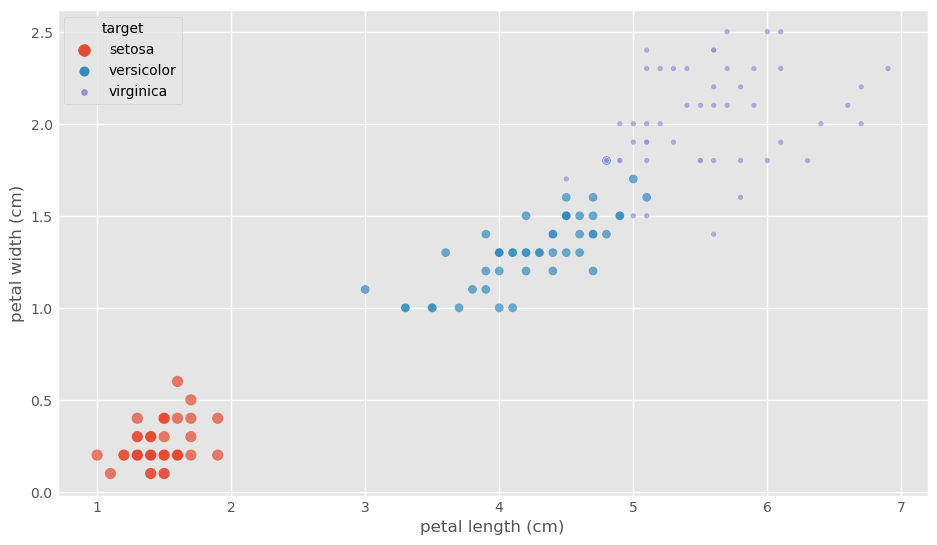

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='target', size='target', alpha=0.7) # 여기에 더 집중되어있다! 표현

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

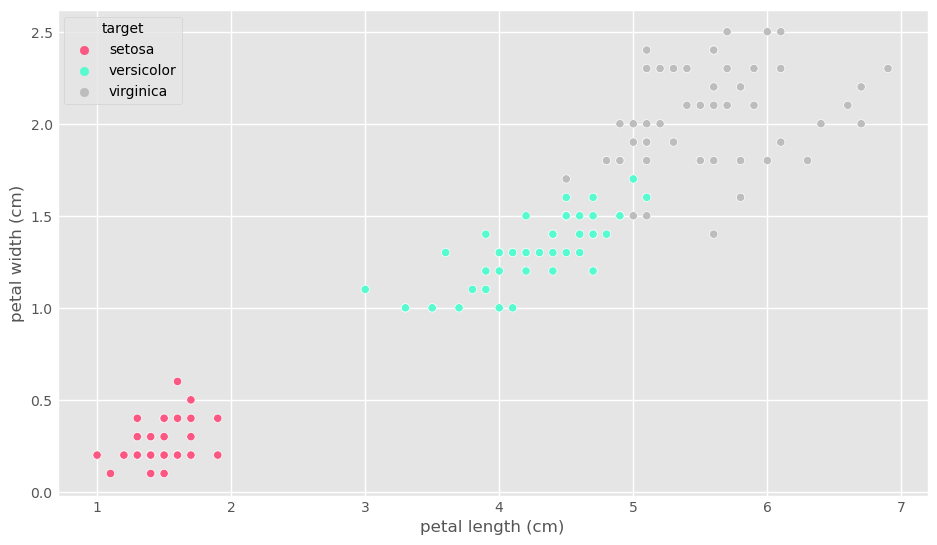

In [49]:
plt.figure(figsize=(10, 6))
sns.set_palette(['#FA5882', '#58FAD0', '#BDBDBD']) # 컬러코드 변경
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='target')

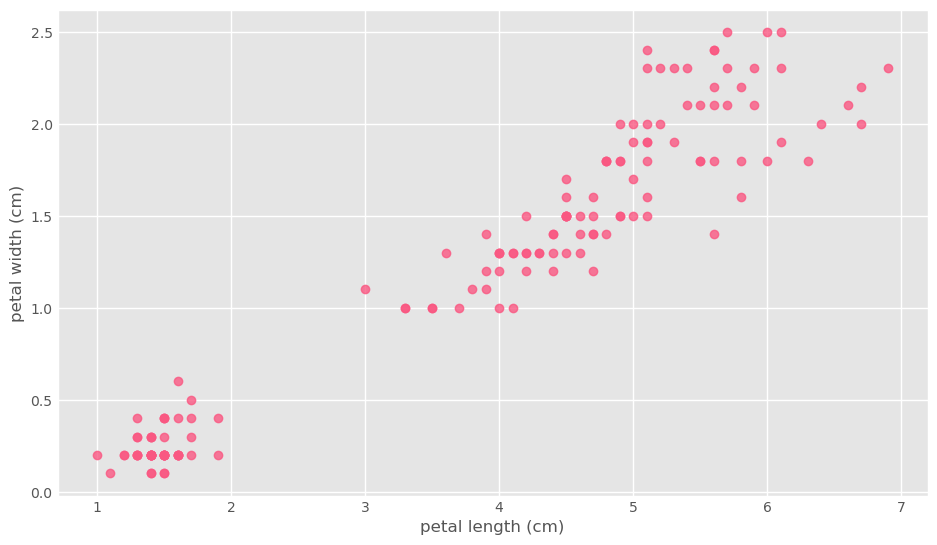

In [50]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=df['petal length (cm)'], y=df['petal width (cm)'], fit_reg=False) # fit_reg > 추세선!

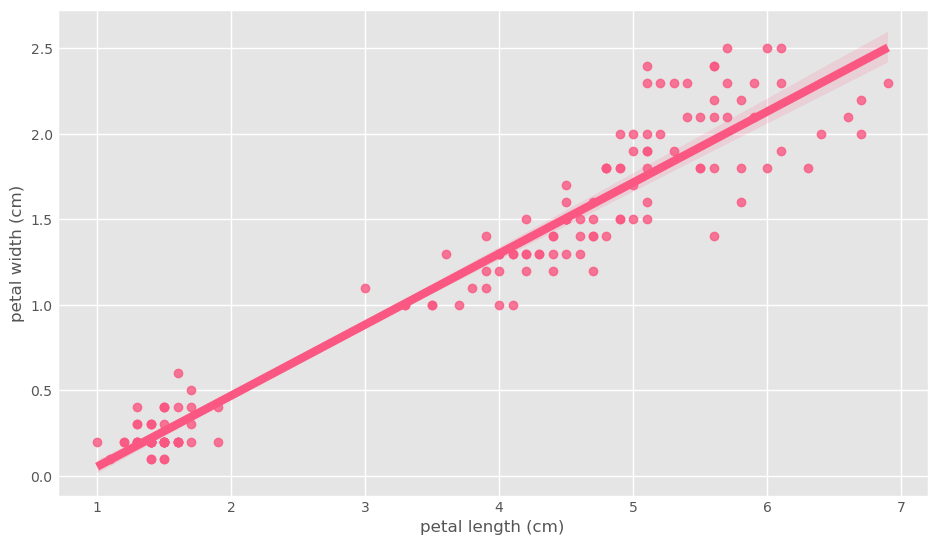

In [51]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=df['petal length (cm)'], y=df['petal width (cm)']) # 추세선 옆의 작은 공간 > 신뢰구간!

<Figure size 1500x900 with 0 Axes>

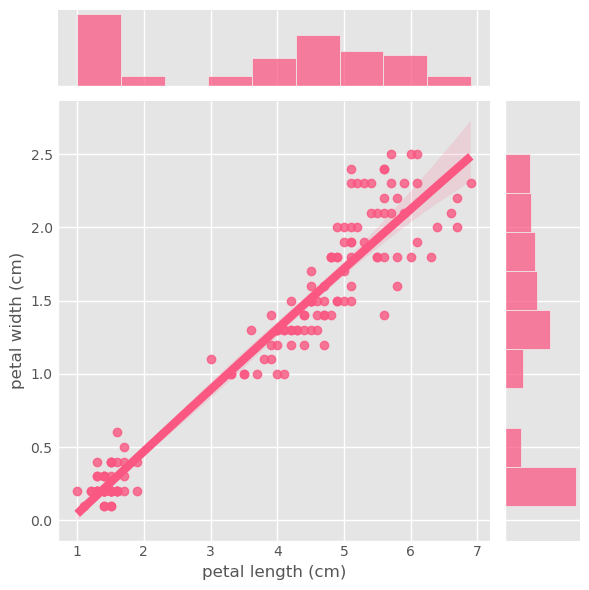

In [53]:
plt.figure(figsize=(15, 9))

jg = sns.JointGrid(x=df['petal length (cm)'], y=df['petal width (cm)'], data=df)  # 눈에 확 들어오는 방법! # 데이터 분포 모양 확인 가능!
jg.plot_joint(sns.regplot, order=2)
jg.plot_marginals(sns.histplot)

## 4. heatmap

In [54]:
df = pd.concat([iris_df, target_df], axis=1) # 데이터 프레임과 데이터 프레임을 합쳐주는 concat() (가져다 붙기이만함!)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [55]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [56]:
df.set_index('target', inplace=True) # inplace=True > True를 사용하지 않으면 df = 를 통해 저장하거나, inplace를 통해 원본 데이터 변경
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2


In [57]:
df.loc[df.index == 'setosa']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
setosa,5.4,3.9,1.7,0.4
setosa,4.6,3.4,1.4,0.3
setosa,5.0,3.4,1.5,0.2
setosa,4.4,2.9,1.4,0.2


In [59]:
setosa_df = df.loc[(df.index == 'setosa')]
setosa_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2


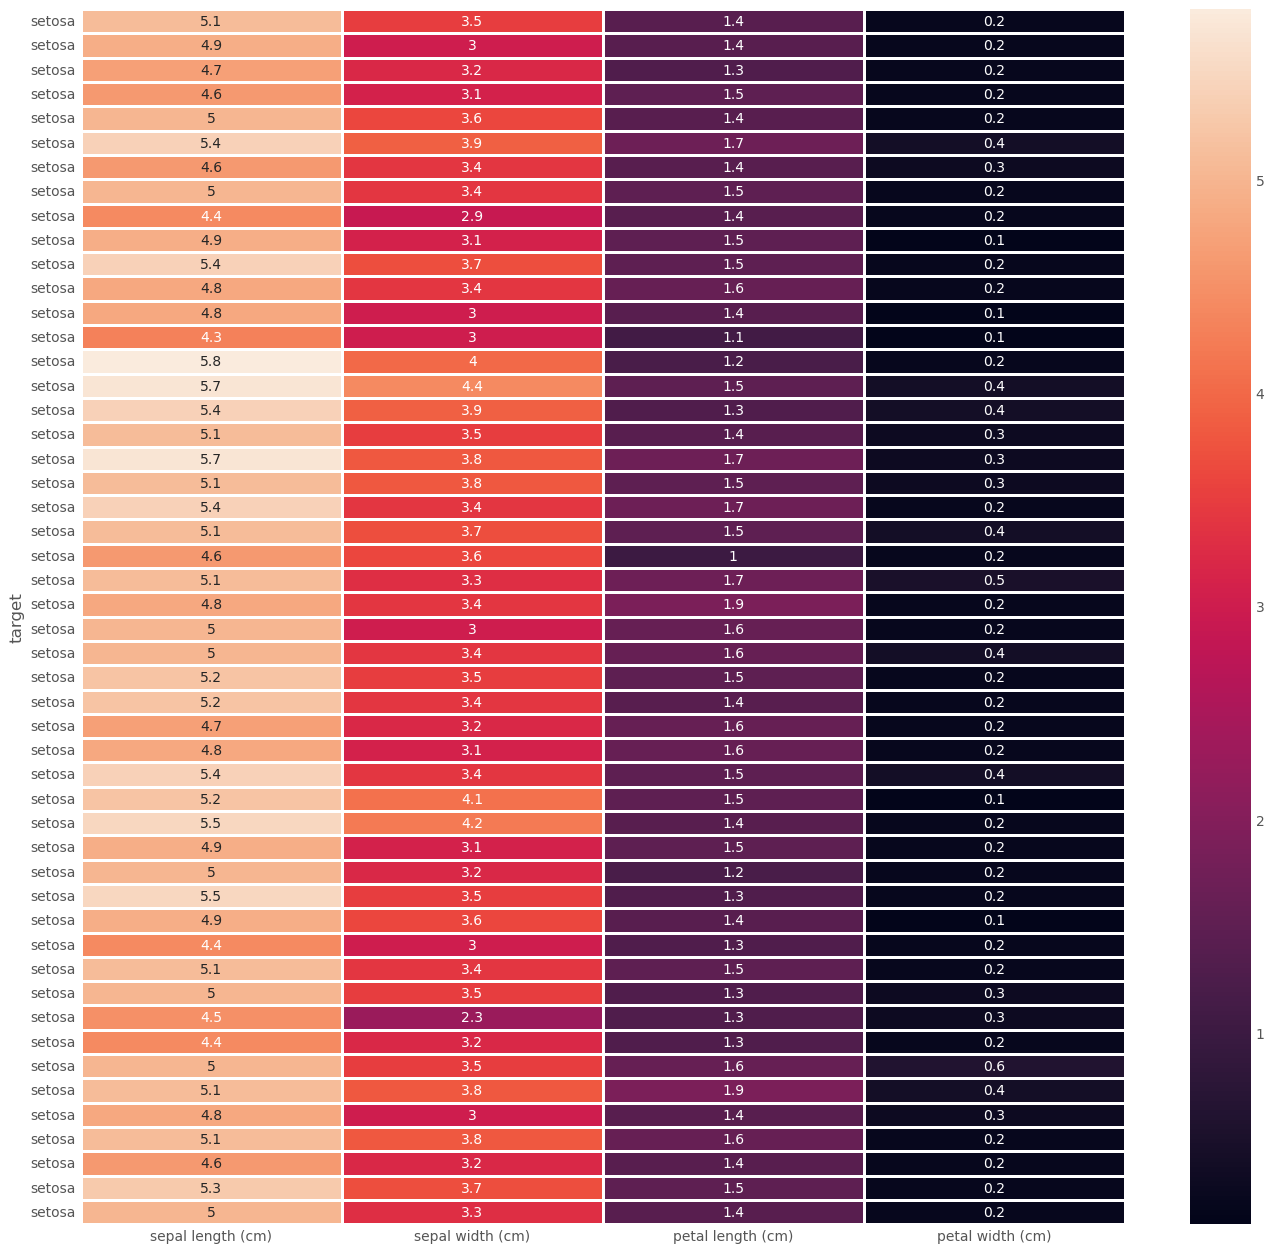

In [60]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(setosa_df, annot=True, linewidths = 1)  # annot 은 숫자 관련 내용

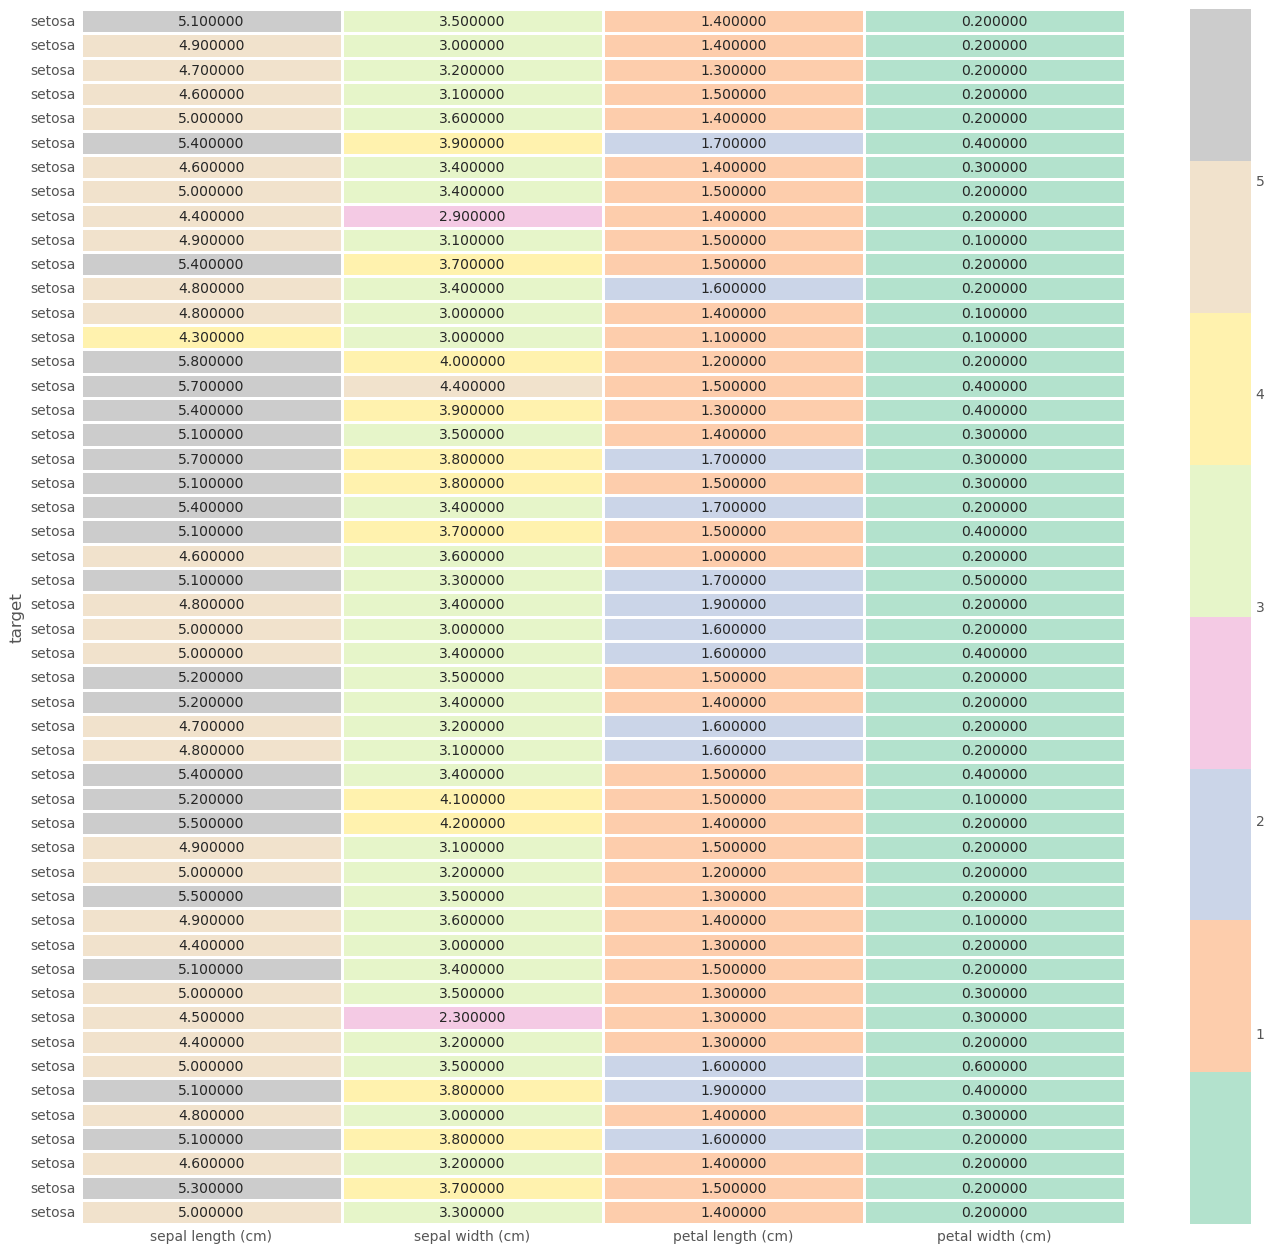

In [61]:
# https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html

plt.figure(figsize=(15, 15))
ax = sns.heatmap(setosa_df, annot=True, fmt='f', linewidths = 1, cmap='Pastel2')  # cmap은 색상 관련 옵션 # 추세를 알기 어려운 색상

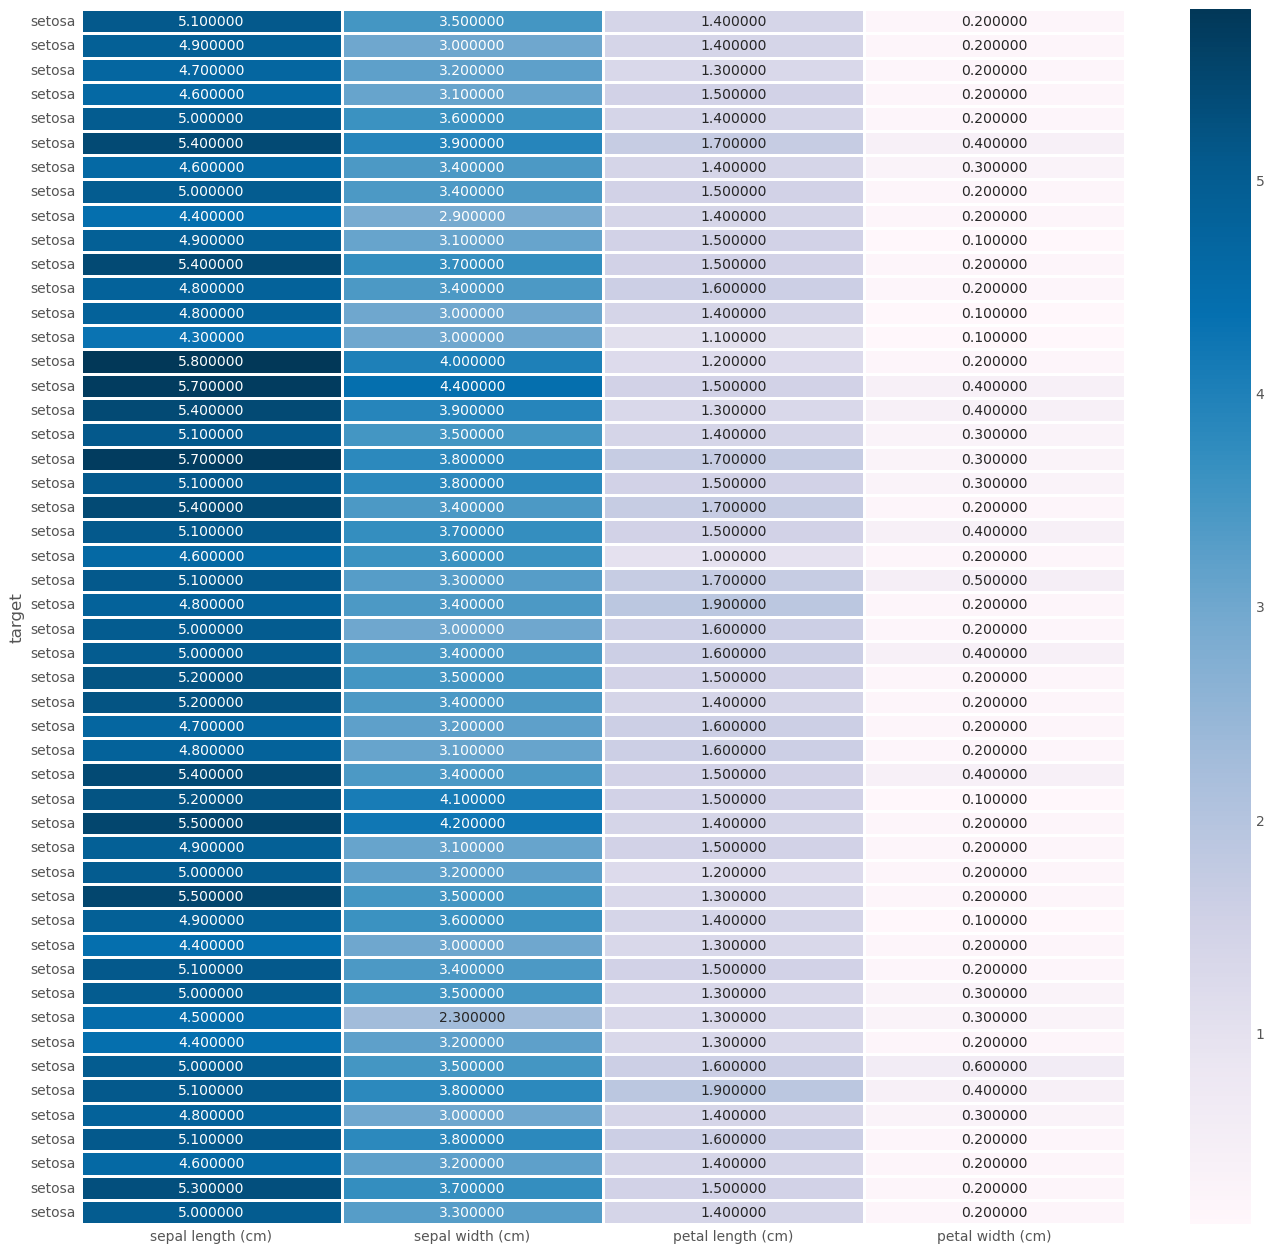

In [62]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(setosa_df, annot=True, fmt='f', linewidths = 1, cmap='PuBu') # 색상에 대한 인지가 쉽다!!

## 5. histogram

In [63]:
df = pd.read_excel('./data.xlsx')
df.head(5)

,product_id,product_type,product_name,size,colour,price,prd_quantity,description,sales_id,order_id,...,order_date,delivery_date,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",22,5,...,2021-3-23,2021-03-24,Artemas Vasilischev,Bigender,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1121,231,...,2021-3-20,2021-04-09,Olimpia Tankus,Genderfluid,39,6434 Callum RoadApt. 396,3505,North Jessica,Western Australia,Australia
2,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1741,353,...,2021-3-30,2021-04-05,Ellynn Korba,Genderqueer,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia
3,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",3201,644,...,2021-3-13,2021-03-22,Brade Caught,Genderqueer,56,38 Baumbach Estate DrApt. 545,7847,Elijahburgh,Queensland,Australia
4,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",4962,992,...,2021-7-23,2021-08-14,Thorsten Sowrey,Polygender,50,7024 Sauer DriveSuite 553,4196,Port Isabelle,South Australia,Australia


In [64]:
df['age'].describe()

count    5000.000000
mean       48.760400
std        17.577519
min        20.000000
25%        34.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: age, dtype: float64

In [65]:
df[df['age'] == 80]

,product_id,product_type,product_name,size,colour,price,prd_quantity,description,sales_id,order_id,...,order_date,delivery_date,customer_name,gender,age,home_address,zip_code,city,state,country
42,10,Shirt,Oxford Cloth,XS,yellow,114,72,"A yellow coloured, XS sized, Oxford Cloth Shirt",3055,614,...,2021-4-18,2021-05-03,Gorden Seago,Genderfluid,80,905 Stephanie BoulevardApt. 217,8114,Port Aaronton,Queensland,Australia
117,28,Shirt,Oxford Cloth,L,indigo,114,70,"A indigo coloured, L sized, Oxford Cloth Shirt",3057,614,...,2021-4-18,2021-05-03,Gorden Seago,Genderfluid,80,905 Stephanie BoulevardApt. 217,8114,Port Aaronton,Queensland,Australia
157,37,Shirt,Dress,M,red,119,57,"A red coloured, M sized, Dress Shirt",2901,580,...,2021-4-30,2021-05-09,Mariellen Medendorp,Agender,80,16 Boyer WaySuite 018,6226,South Gabriel,Western Australia,Australia
473,121,Shirt,Denim,S,green,115,49,"A green coloured, S sized, Denim Shirt",4726,948,...,2021-8-24,2021-09-02,Adamo Saddington,Male,80,3168 Bartoletti CrescentSuite 878,593,Port Lucas,Queensland,Australia
522,133,Shirt,Denim,L,indigo,115,58,"A indigo coloured, L sized, Denim Shirt",3043,611,...,2021-5-1,2021-05-25,Myrle Kelby,Male,80,85 Charles MallSuite 424,7841,Port Sophia,New South Wales,Australia
533,134,Shirt,Denim,XL,indigo,115,58,"A indigo coloured, XL sized, Denim Shirt",4242,844,...,2021-9-26,2021-10-18,Adamo Saddington,Male,80,3168 Bartoletti CrescentSuite 878,593,Port Lucas,Queensland,Australia
552,139,Shirt,Denim,XL,violet,115,73,"A violet coloured, XL sized, Denim Shirt",4244,844,...,2021-9-26,2021-10-18,Adamo Saddington,Male,80,3168 Bartoletti CrescentSuite 878,593,Port Lucas,Queensland,Australia
571,146,Shirt,Linen,S,orange,116,42,"A orange coloured, S sized, Linen Shirt",3045,611,...,2021-5-1,2021-05-25,Myrle Kelby,Male,80,85 Charles MallSuite 424,7841,Port Sophia,New South Wales,Australia
583,149,Shirt,Linen,XL,orange,116,59,"A orange coloured, XL sized, Linen Shirt",1761,356,...,2021-4-1,2021-04-15,Anders Couvert,Non-binary,80,64 Phillips RunApt. 722,2752,East Sienna,New South Wales,Australia
598,154,Shirt,Linen,XL,yellow,116,54,"A yellow coloured, XL sized, Linen Shirt",115,26,...,2021-4-25,2021-05-04,Gorden Seago,Genderfluid,80,905 Stephanie BoulevardApt. 217,8114,Port Aaronton,Queensland,Australia


(array([588., 461., 522., 513., 507., 451., 564., 428., 427., 539.]),
 array([20., 26., 32., 38., 44., 50., 56., 62., 68., 74., 80.]),
 <BarContainer object of 10 artists>)

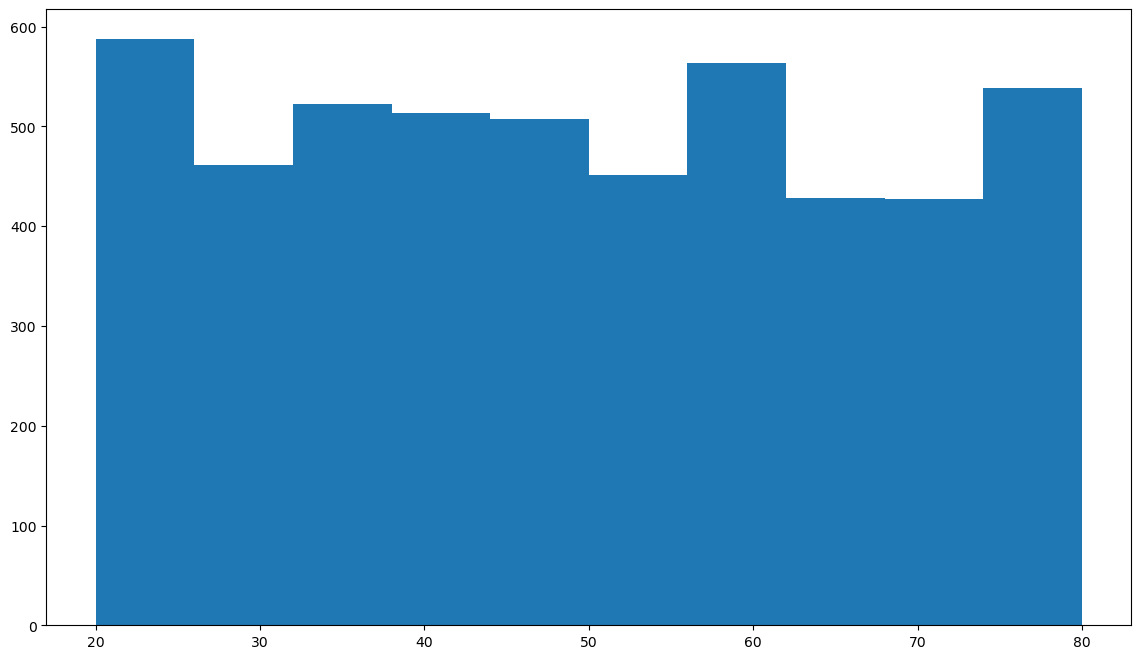

In [69]:
plt.style.use('default')
plt.figure(figsize=(14, 8))
plt.hist(df['age'])

In [70]:
tb = pd.DataFrame([[20., 26., 32., 38., 44., 50., 56., 62., 68., 74., 80.],
                    [588., 461., 522., 513., 507., 451., 564., 428., 427., 539.]]).T # .T 를 통해, 90도 회전!

tb.columns = ['계급', '도수']
tb

,계급,도수
0,20.0,588.0
1,26.0,461.0
2,32.0,522.0
3,38.0,513.0
4,44.0,507.0
5,50.0,451.0
6,56.0,564.0
7,62.0,428.0
8,68.0,427.0
9,74.0,539.0


In [71]:
tb = tb.dropna()

(array([184., 192., 212., 215., 100., 146., 177., 227., 118., 194., 158.,
        161., 213., 160., 134., 101., 191., 159., 227., 154., 183., 210.,
         79., 139., 171., 131., 125., 219., 106., 214.]),
 array([20., 22., 24., 26., 28., 30., 32., 34., 36., 38., 40., 42., 44.,
        46., 48., 50., 52., 54., 56., 58., 60., 62., 64., 66., 68., 70.,
        72., 74., 76., 78., 80.]),
 <BarContainer object of 30 artists>)

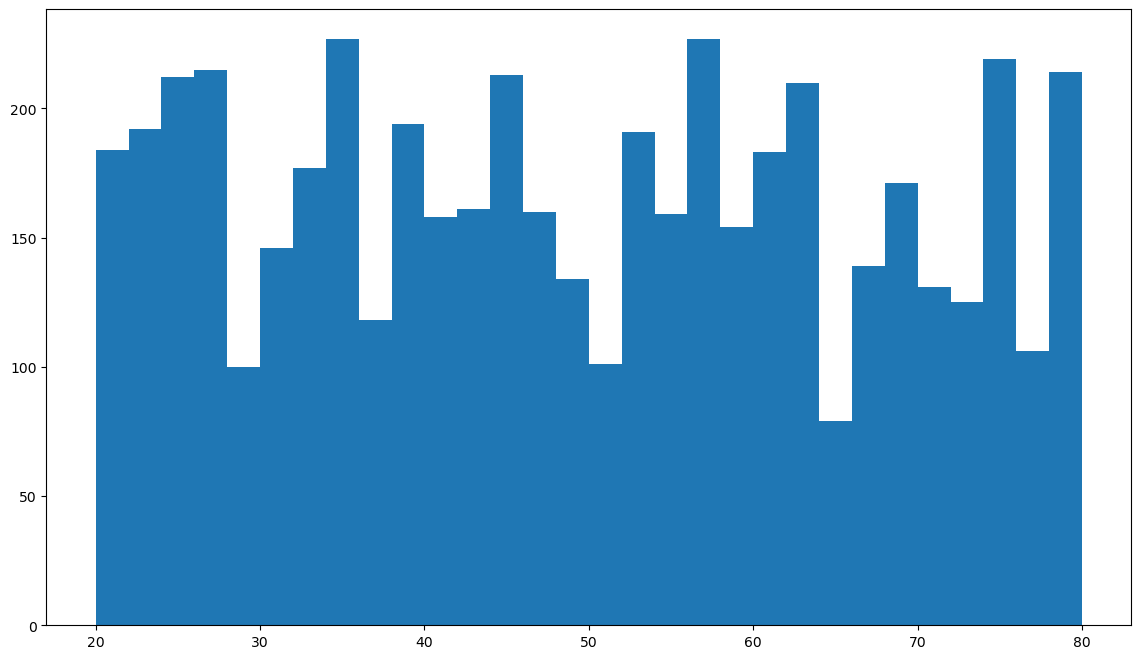

In [72]:
# frequency
plt.figure(figsize=(14, 8))
plt.hist(df['age'], bins=30) # bins 설정에 따라 시각화가 잘되냐/안되냐를 결정

(array([0.0184, 0.0192, 0.0212, 0.0215, 0.01  , 0.0146, 0.0177, 0.0227,
        0.0118, 0.0194, 0.0158, 0.0161, 0.0213, 0.016 , 0.0134, 0.0101,
        0.0191, 0.0159, 0.0227, 0.0154, 0.0183, 0.021 , 0.0079, 0.0139,
        0.0171, 0.0131, 0.0125, 0.0219, 0.0106, 0.0214]),
 array([20., 22., 24., 26., 28., 30., 32., 34., 36., 38., 40., 42., 44.,
        46., 48., 50., 52., 54., 56., 58., 60., 62., 64., 66., 68., 70.,
        72., 74., 76., 78., 80.]),
 <BarContainer object of 30 artists>)

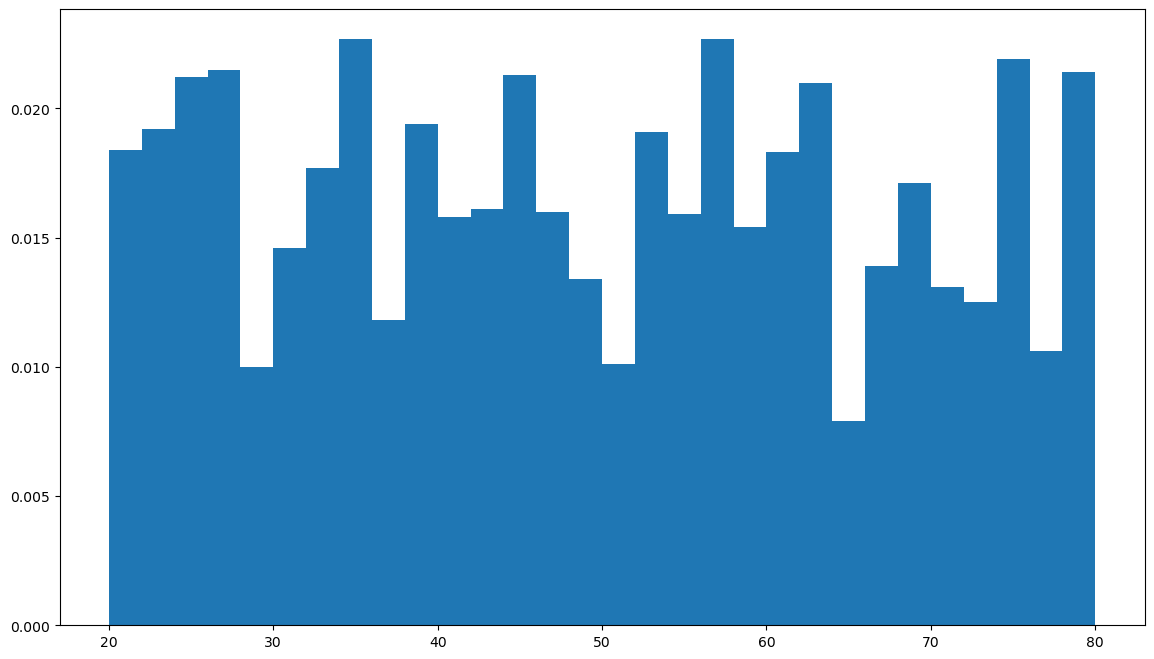

In [73]:
# density
plt.figure(figsize=(14, 8))
plt.hist(df['age'], bins=30, density=True) # density 를 통해, y 출 밀도 표현 가능!

In [74]:
shirt = list(df[df['product_type'] == 'Shirt'].age)
jacket = list(df[df['product_type'] == 'Jacket'].age)

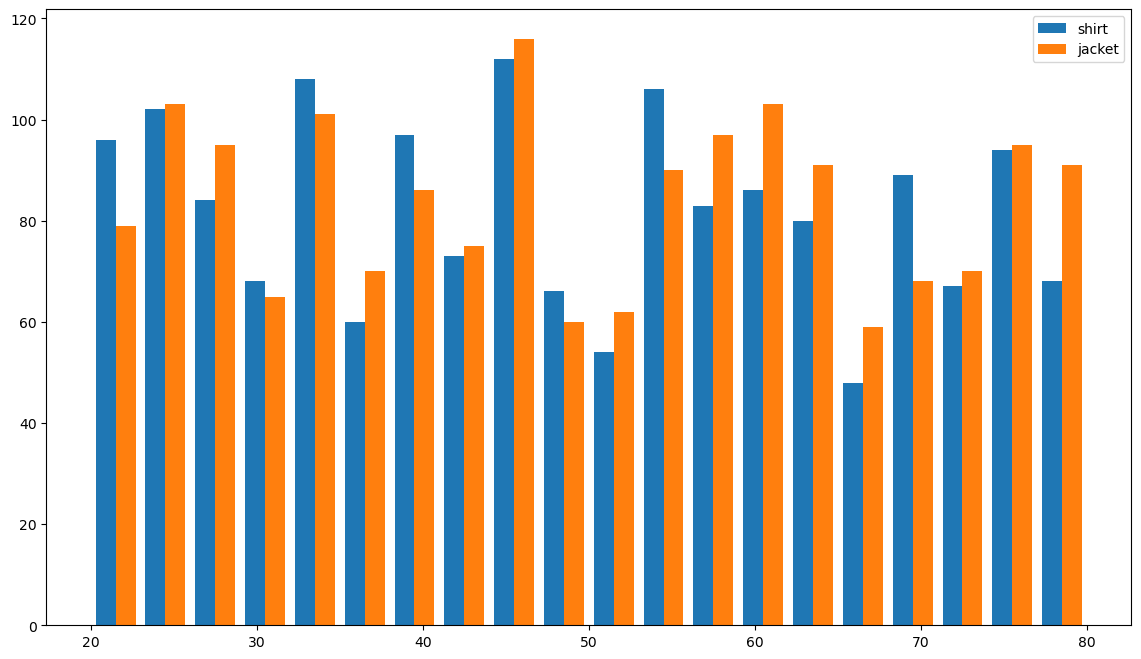

In [75]:
plt.figure(figsize=(14, 8))

plt.hist([shirt, jacket], 20, label=['shirt', 'jacket'])
plt.legend(loc='upper right')
plt.show()

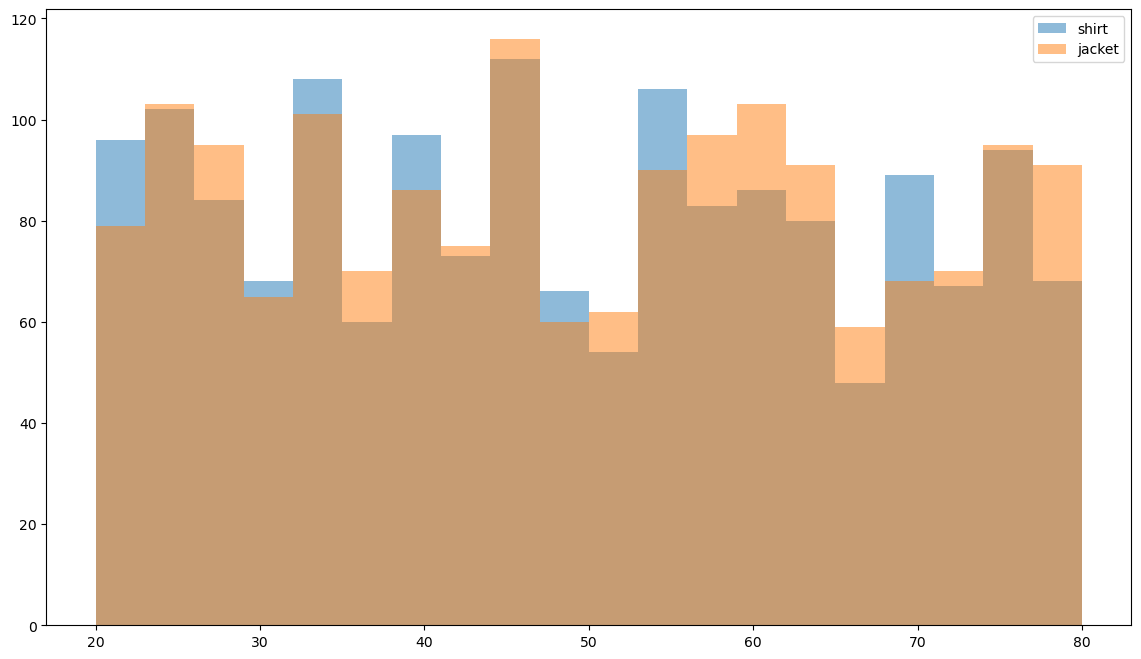

In [76]:
plt.figure(figsize=(14, 8))

plt.hist(shirt, 20, alpha = 0.5, label='shirt')
plt.hist(jacket, 20, alpha = 0.5, label='jacket')
plt.legend(loc='upper right')

plt.show()

## 6. timeseries

In [78]:
df = pd.read_excel('./crime.xlsx')
df

,dt,lat,long
0,2016-09-30,40.837376,-73.887761
1,2016-09-30,40.661205,-73.950687
2,2016-09-30,40.816872,-73.850685
3,2016-09-30,40.696177,-73.804492
4,2016-09-30,40.741458,-73.884339
...,...,...,...
353202,2016-11-26,40.853241,-73.853654
353203,2016-11-21,40.832747,-73.940770
353204,2016-09-03,40.651416,-73.840882
353205,2016-07-05,40.698159,-73.795085


In [79]:
df.groupby('dt').size().reset_index()

,dt,0
0,2016-01-01,2008
1,2016-01-02,1168
2,2016-01-03,1062
3,2016-01-04,1077
4,2016-01-05,1030
...,...,...
361,2016-12-27,101
362,2016-12-28,144
363,2016-12-29,128
364,2016-12-30,207


In [80]:
time_df = df.groupby('dt').size().reset_index()
time_df.columns = ['dt', 'crime_cnt']
time_df.head()

,dt,crime_cnt
0,2016-01-01,2008
1,2016-01-02,1168
2,2016-01-03,1062
3,2016-01-04,1077
4,2016-01-05,1030


<Figure size 1500x700 with 0 Axes>

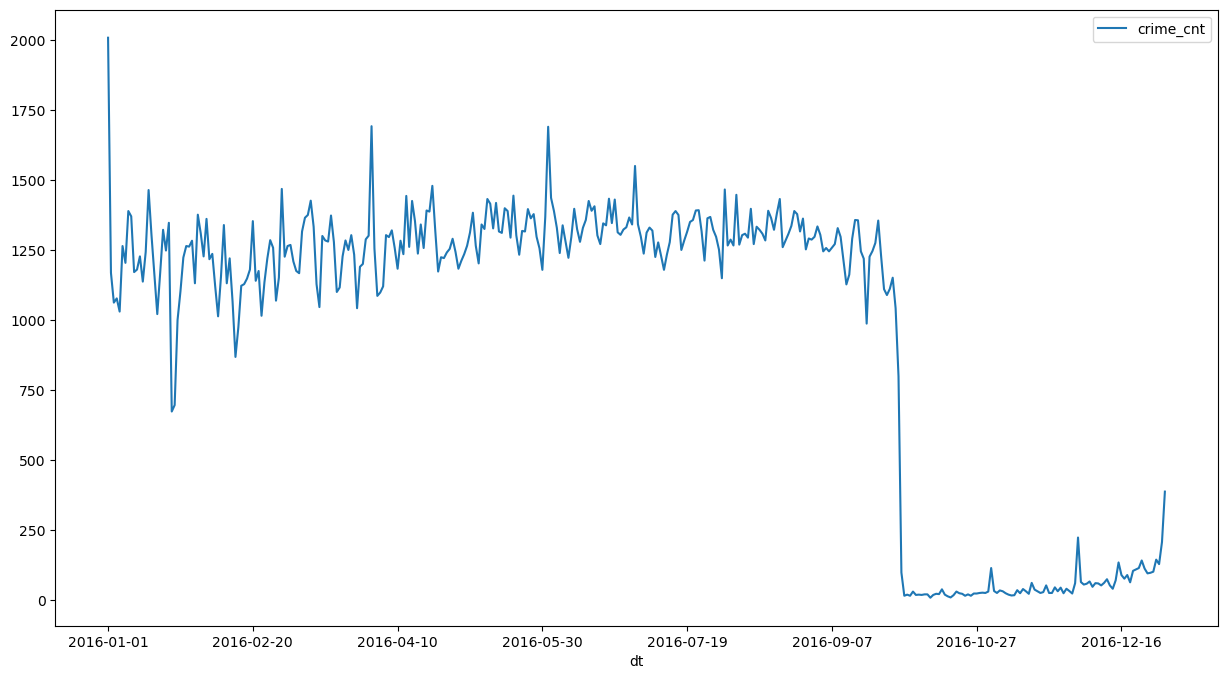

In [81]:
# additive model: trend + cycle + seasonal + irregular

import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
ax = time_df.plot(x='dt', y='crime_cnt', figsize=(15,8))

In [82]:
time_df.head()

,dt,crime_cnt
0,2016-01-01,2008
1,2016-01-02,1168
2,2016-01-03,1062
3,2016-01-04,1077
4,2016-01-05,1030


In [83]:
time_df['dt'] = pd.to_datetime(time_df['dt'])

In [84]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   dt         366 non-null    datetime64[ns]
 1   crime_cnt  366 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [85]:
time_df.head()

,dt,crime_cnt
0,2016-01-01,2008
1,2016-01-02,1168
2,2016-01-03,1062
3,2016-01-04,1077
4,2016-01-05,1030


In [86]:
time_df = time_df.set_index('dt')

In [88]:
result = sm.tsa.seasonal_decompose(time_df.crime_cnt)

In [89]:
result

<AxesSubplot:xlabel='dt'>

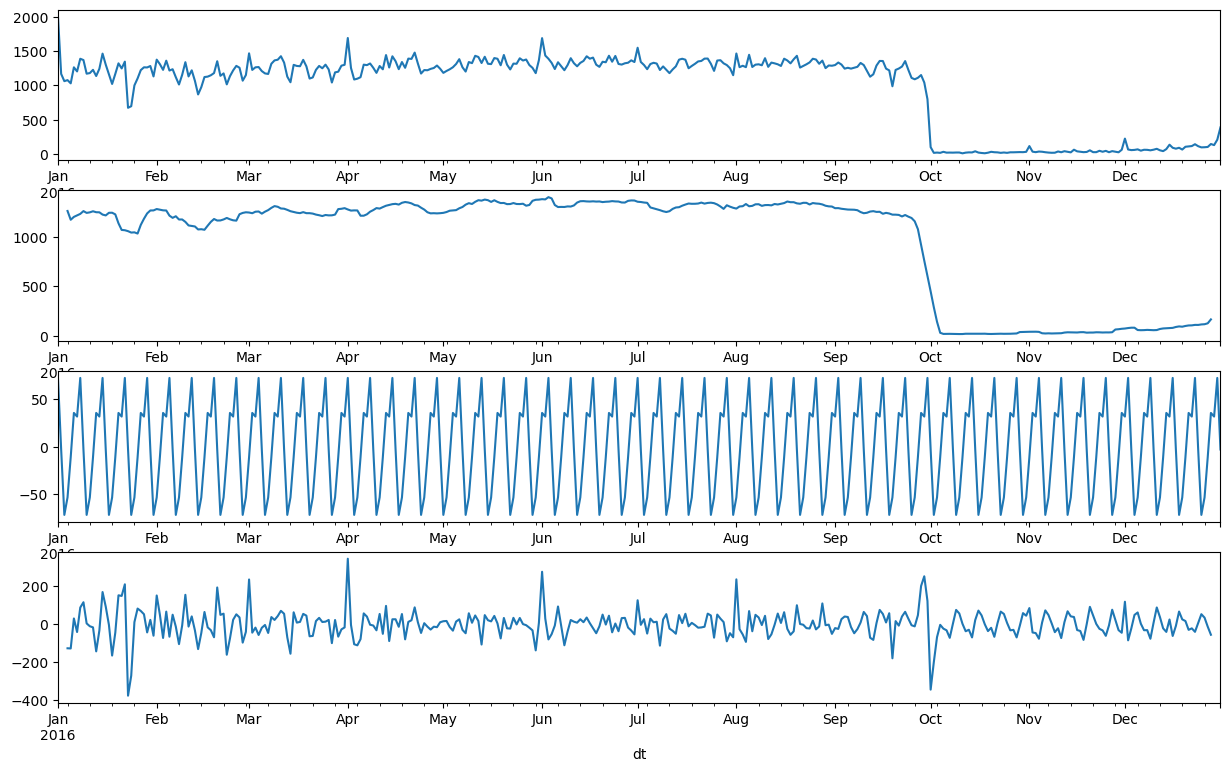

In [90]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,9))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)

In [91]:
# ascending=False
time_df = time_df.sort_values(by='dt')
time_df.head(10)

,crime_cnt
dt,
2016-01-01,2008
2016-01-02,1168
2016-01-03,1062
2016-01-04,1077
2016-01-05,1030
2016-01-06,1264
2016-01-07,1204
2016-01-08,1389
2016-01-09,1370


In [92]:
time_df['crime_cnt'].rolling(window=2).mean()

dt
2016-01-01       NaN
2016-01-02    1588.0
2016-01-03    1115.0
2016-01-04    1069.5
2016-01-05    1053.5
               ...  
2016-12-27      99.0
2016-12-28     122.5
2016-12-29     136.0
2016-12-30     167.5
2016-12-31     297.0
Name: crime_cnt, Length: 366, dtype: float64

In [93]:
time_df['moving_avg7'] = time_df['crime_cnt'].rolling(window=7).mean()
time_df['moving_avg14'] = time_df['crime_cnt'].rolling(window=14).mean()
time_df['moving_avg21'] = time_df['crime_cnt'].rolling(window=21).mean()

In [94]:
time_df

,crime_cnt,moving_avg7,moving_avg14,moving_avg21
dt,,,,
2016-01-01,2008,NaN,NaN,NaN
2016-01-02,1168,NaN,NaN,NaN
2016-01-03,1062,NaN,NaN,NaN
2016-01-04,1077,NaN,NaN,NaN
2016-01-05,1030,NaN,NaN,NaN
...,...,...,...,...
2016-12-27,101,109.857143,99.571429,85.333333
2016-12-28,144,114.857143,104.857143,89.333333
2016-12-29,128,116.857143,104.428571,92.619048


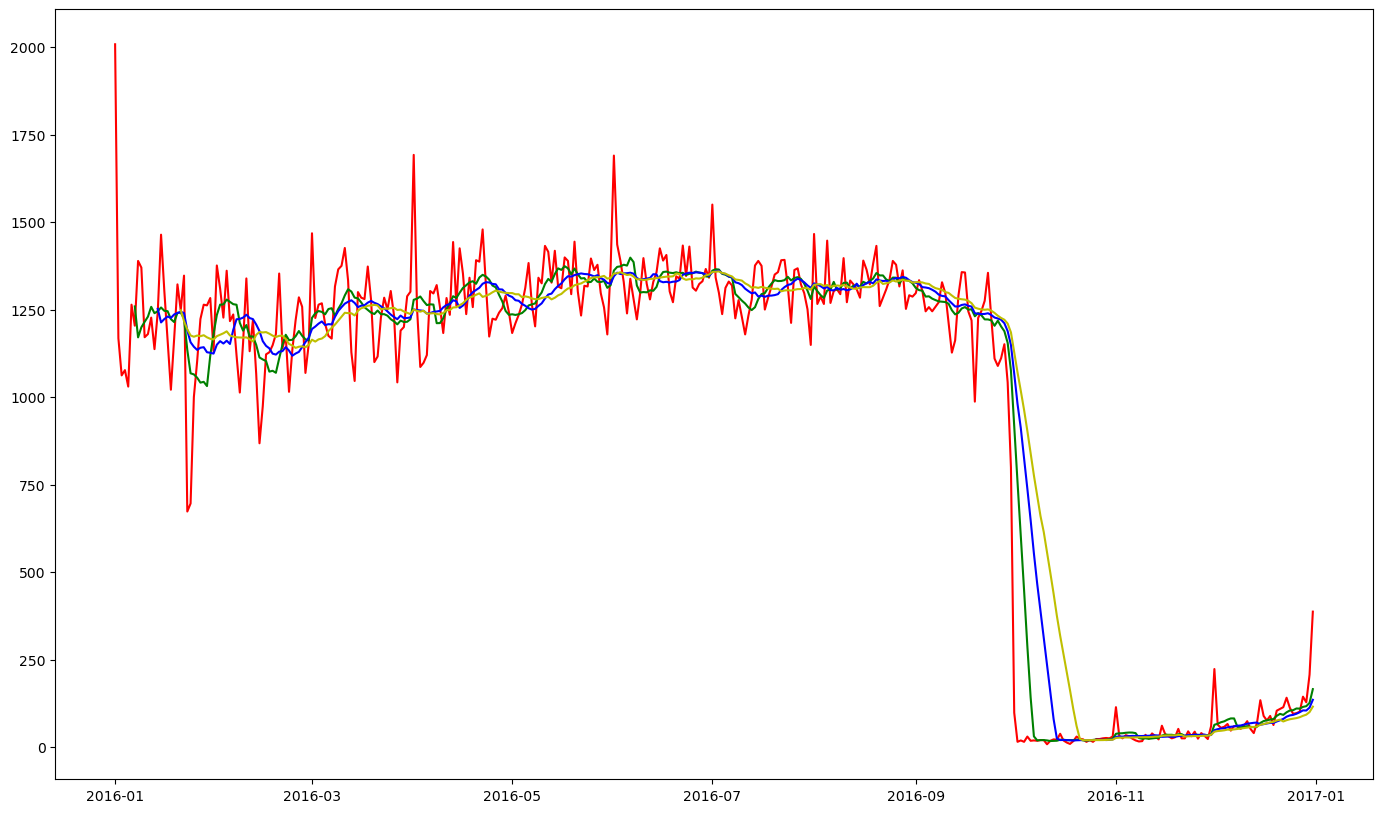

In [95]:
plt.figure(figsize=(17,10))

plt.plot(time_df.index, time_df.crime_cnt, color='r')
plt.plot(time_df.index, time_df.moving_avg7, color='g')
plt.plot(time_df.index, time_df.moving_avg14, color='b')
plt.plot(time_df.index, time_df.moving_avg21, color='y')

plt.show()

## 7. catogram (번외)

In [97]:
df = pd.read_excel('./crime.xlsx')
df

,dt,lat,long
0,2016-09-30,40.837376,-73.887761
1,2016-09-30,40.661205,-73.950687
2,2016-09-30,40.816872,-73.850685
3,2016-09-30,40.696177,-73.804492
4,2016-09-30,40.741458,-73.884339
...,...,...,...
353202,2016-11-26,40.853241,-73.853654
353203,2016-11-21,40.832747,-73.940770
353204,2016-09-03,40.651416,-73.840882
353205,2016-07-05,40.698159,-73.795085


In [98]:
df.dropna(inplace=True) # inplace=True 가 없으면, df = df.dropna() 와 같은 식으로 표현 필요
df

,dt,lat,long
0,2016-09-30,40.837376,-73.887761
1,2016-09-30,40.661205,-73.950687
2,2016-09-30,40.816872,-73.850685
3,2016-09-30,40.696177,-73.804492
4,2016-09-30,40.741458,-73.884339
...,...,...,...
353202,2016-11-26,40.853241,-73.853654
353203,2016-11-21,40.832747,-73.940770
353204,2016-09-03,40.651416,-73.840882
353205,2016-07-05,40.698159,-73.795085


In [ ]:
# !pip install h3 # h3 사용을 위해, 패키지 설치 필요
# !pip install geopandas
# !pip install geojson